# Karakteristike snabdijevanja toplotnom energijom - Kotlovnica Podvožnjak

In [180]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

Satni podaci za 4 grane u periodu od 4.12.2021. do 6.1.2022. su spašeni u fajlu "Podvožnjak.xlsx" na četiri radna lista ("Sheet 1 - 4"). Ovim podacima će se dodijeliti vremenski otisci u vidu datuma i sata kako bi se kasnije analizirali po vremenskim značajkama.

In [181]:
file=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet1",header=0)
file1=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet2",header=None)

file2=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet3",header=None)
file3=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet4",header=None)

In [182]:
def create_date_range(start,end):
    date_range=pd.date_range(start,end,freq="1H").strftime("%m-%d-%Y, %H:%M")[::-1]
    return date_range

In [183]:
date_range=create_date_range("2021-12-04 16:00","2022-01-06 11:00")
date_range1=create_date_range("2021-12-04 16:00","2022-01-06 12:00")
date_range2=create_date_range("2021-12-04 16:00","2022-01-06 12:00")
date_range3=create_date_range("2021-12-04 16:00","2022-01-06 12:00")

In [184]:
def set_index1(data,date_range):
    data=data.set_index(date_range)
    return data

In [185]:
file=set_index1(file,date_range)
file1=set_index1(file1,date_range1)
file2=set_index1(file2,date_range2)
file3=set_index1(file3,date_range3)

Kolone će se preimenovati u skladu sa svakom granom.

In [186]:
file.columns=[ "Index", "Datum","Kumrovec-Potrošnja, MWh"]
file1.columns=[ "Index", "Datum","oko kotlovnice-Potrošnja, MWh"]
file2.columns=[ "Index", "Datum","niz uz Vranica-Potrošnja, MWh"]
file3.columns=[ "Index", "Datum","Vranica-Potrošnja, MWh"]

Za svaku granu će se dodijeliti sat, dan i mjesec potrošnje, te dan u sedmici (indeks 1 odgovara ponedjeljku, a indeks 6 nedjelji).

In [187]:
def assign_date_properties(file):
    file=file.assign(Sat=pd.to_datetime(file.index).hour)
    file=file.assign(Mjesec=pd.to_datetime(file.index).month)#format dana i mjeseca zamijenjen
    file=file.assign(Dan=pd.to_datetime(file.index).day)
    file=file.assign(Dan_u_sedmici=pd.to_datetime(file.index).dayofweek)
    return file

In [188]:
file=assign_date_properties(file)
file1=assign_date_properties(file1)
file2=assign_date_properties(file2)
file3=assign_date_properties(file3)

Text(0.5, 1.0, 'Satni podaci potrošnje u razdoblju 4.12.2021. - 6.1.2022. ')

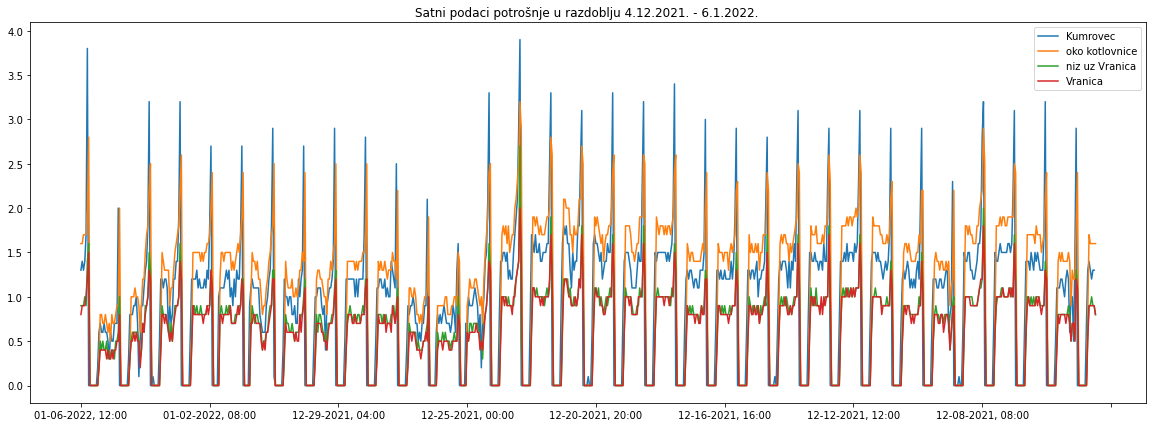

In [189]:
fig, ax = plt.subplots(figsize=(20,7))
file["Kumrovec-Potrošnja, MWh"].plot(ax=ax,label="Kumrovec")
file1["oko kotlovnice-Potrošnja, MWh"].plot(ax=ax,label="oko kotlovnice")
file2["niz uz Vranica-Potrošnja, MWh"].plot(ax=ax,label="niz uz Vranica")
file3["Vranica-Potrošnja, MWh"].plot(ax=ax,label="Vranica")
plt.legend()
plt.title("Satni podaci potrošnje u razdoblju 4.12.2021. - 6.1.2022. ")
#total.plot(ax=ax,label="Ukupno, MW")

Text(0.5, 1.0, 'Potrošnja po danima u posmatranom periodu')

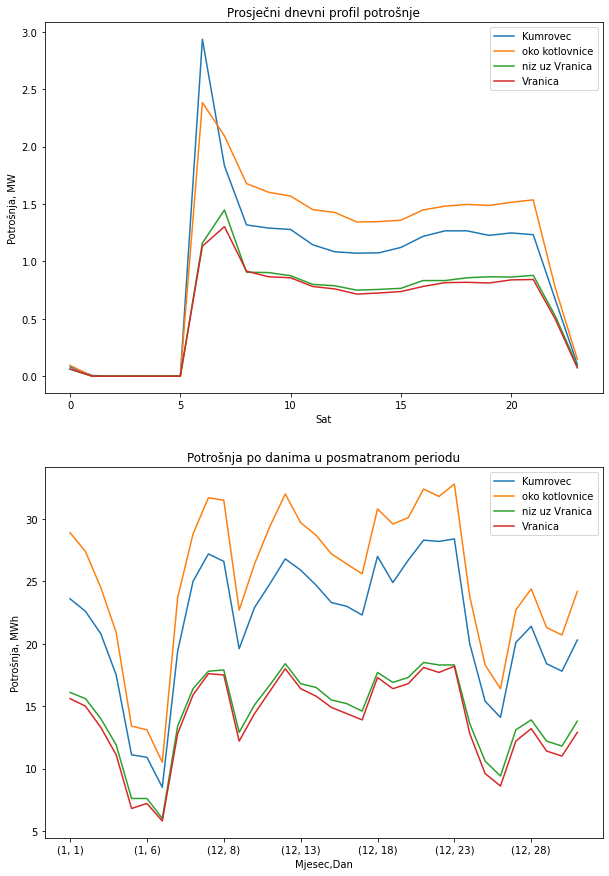

In [190]:
fig, ax = plt.subplots(nrows=2,figsize=(10,15))

filex=file.groupby("Sat")["Kumrovec-Potrošnja, MWh"].mean().plot(ax=ax[0],label="Kumrovec")
filex1=file1.groupby("Sat")["oko kotlovnice-Potrošnja, MWh"].mean().plot(ax=ax[0],label="oko kotlovnice")
filex2=file2.groupby("Sat")["niz uz Vranica-Potrošnja, MWh"].mean().plot(ax=ax[0],label="niz uz Vranica")
filex3=file3.groupby("Sat")["Vranica-Potrošnja, MWh"].mean().plot(ax=ax[0],label="Vranica")
ax[0].set_ylabel("Potrošnja, MW")
ax[0].legend()
ax[0].set_title("Prosječni dnevni profil potrošnje")



file.groupby(["Mjesec","Dan"])["Kumrovec-Potrošnja, MWh"].sum().plot(ax=ax[1],label="Kumrovec")
file1.groupby(["Mjesec","Dan"])["oko kotlovnice-Potrošnja, MWh"].sum().plot(ax=ax[1],label="oko kotlovnice")
file2.groupby(["Mjesec","Dan"])["niz uz Vranica-Potrošnja, MWh"].sum().plot(ax=ax[1],label="niz uz Vranica")
file3.groupby(["Mjesec","Dan"])["Vranica-Potrošnja, MWh"].sum().plot(ax=ax[1],label="Vranica")
ax[1].set_ylabel("Potrošnja, MWh")
ax[1].legend()
ax[1].set_title("Potrošnja po danima u posmatranom periodu")

In [194]:
week=file.groupby(["Dan_u_sedmici","Sat"])["Kumrovec-Potrošnja, MWh"].sum()
week1=file1.groupby(["Dan_u_sedmici","Sat"])["oko kotlovnice-Potrošnja, MWh"].sum()
week2=file2.groupby(["Dan_u_sedmici","Sat"])["niz uz Vranica-Potrošnja, MWh"].sum()
week3=file3.groupby(["Dan_u_sedmici","Sat"])["Vranica-Potrošnja, MWh"].sum()


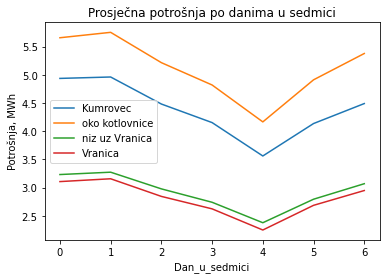

In [202]:
fig, ax = plt.subplots()

week.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="Kumrovec")
week1.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="oko kotlovnice")
week2.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="niz uz Vranica")
week3.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="Vranica")
ax.set_ylabel("Potrošnja, MWh")
ax.legend()
ax.set_title("Prosječna potrošnja po danima u sedmici")
plt.show()